# Curso de Optimización I (DEMAT/CIMAT)
# Tarea

| Descripción:                         | Fechas                  |
|--------------------------------------|-------------------------|
| Fecha de publicación del documento:  | **Febrero 20, 2024**    |
| Fecha límite de entrega de la tarea: | **Febrero 27, 2024**    |

## Indicaciones

Puede escribir el código de los algoritmos que se piden en una
celda de este notebook o si lo prefiere, escribir las funciones
en un archivo `.py` independiente e importar la funciones para
usarlas en este notebook. Lo importante es que en el notebook
aparezcan los resultados de la pruebas realizadas y que:

- Si se requieren otros archivos para poder reproducir los resultados,
  para mandar la tarea cree un archivo ZIP en el que incluya
  el notebook y los archivos adicionales.
- Si todos los códigos para que se requieren para reproducir los
  resultados están en el notebook, no hace falta comprimir el notebook
  y puede anexar este archivo en la tarea del Classroom.
- Exportar el notebook a un archivo PDF y anexarlo en la tarea del
  Classroom como un archivo independiente.
  **No incluya el PDF dentro del ZIP**, porque la idea que lo pueda accesar
  directamente para poner anotaciones y la calificación de cada ejercicio.

En la descripción de los ejercicios se nombran algunas variables
para el algoritmo, pero sólo es para facilitar la descripción.
En la implementación pueden nombrar sus variables como gusten.

En los algoritmos se describen las entradas de las
funciones. La intención es que tomen en cuenta lo que requiere
el algoritmo y que tiene que haber parámetros que permitan
controlar el comportamiento del algoritmo,
evitando que dejen fijo un valor y que no se puede modificar
para hacer diferentes pruebas. Si quieren dar esta información
usando un tipo de dato que contenga todos los valores o
usar variables por separado, etc., lo pueden hacer y no usen
variables globales si no es necesario.

Lo mismo para los valores que devuelve una función.
Pueden codificar como gusten la manera en que regresa los cálculos.
El punto es que podamos tener acceso a los resultados para poder usarlos,
y por eso no es conveniente que la función sólo imprima los valores
sin devolverlos.

Para los ejercicios teóricos puede escribir en la celda la solución, o
si escribio la solución en una hoja, puede insertar una(s) foto(s) en la que
se vea clara la solución. Si le es más facíl insertar la imagen en un procesador
de texto como Word, lo puede utilizar y exportar el documento a PDF y subir
el archivo. No lo compacte para que se pueda escribir anotaciones en el PDF.

---

## Ejercicio 1 (2 puntos)

Para cada función $f(\mathbf{x})$ calcule de manera analítica la Hessiana  
y en cada caso programe la función recibe un punto $\mathbf{x}$ y devuelve
$\nabla^2 f(\mathbf{x})$.

**Función de Himmelblau:** Para $\mathbf{x}=(x_1,x_2)$

$$ f(\mathbf{x}) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2. $$


**Función de Beale :** Para $\mathbf{x}=(x_1,x_2)$

$$ f(\mathbf{x}) = (1.5-x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2.$$
   

**Función de Rosenbrock:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

$$ f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[100(x_{i+1} - x_i^2)^2 + (1-x_i)^2 \right]
\quad n\geq 2.$$

**Función de Hartmann de dimensión 6 ([Referencia](https://www.sfu.ca/~ssurjano/hart6.html)):**
Para $\mathbf{x}=(x_1,x_2, ..., x_6)$

$$ f(\mathbf{x}) = -\frac{1}{1.94} \left[ 2.58 +
\sum_{i=1}^{4} \alpha_i \exp\left(-\sum_{i=1}^{6}a_{ij}(x_j-p_{ij})^2 \right)\right],$$
donde
$$ \alpha = (1.0, 1.2, 3.0, 3.2)$$
$$ \mathbf{A} = [a_{ij}] = \begin{bmatrix}
10   &   3 &   17 & 3.5 & 1.7 &  8 \\
0.05 &  10 &   17 & 0.1 & 8   & 14 \\
3    & 3.5 & 1.7  & 10  & 17  & 8  \\
17   & 8   & 0.05 & 10  & 0.1 & 14
\end{bmatrix}, \quad
\mathbf{P} = [p_{ij}] = 10^{-4} \begin{bmatrix}
1312 & 1696 & 5569 &  124 & 8283 & 5886 \\
2329 & 4135 & 8307 & 3736 & 1004 & 9991 \\
2348 & 1451 & 3522 & 2883 & 3047 & 6650 \\
4047 & 8828 & 8732 & 5743 & 1091 & 381
\end{bmatrix}.
$$

Esta función tiene 6 óptimos locales. El óptimo global es
$\mathbf{x}_* = (0.20169, 0.15001,  0.476874, 0.275332, 0.311652, 0.6573)$,
y $f(\mathbf{x}_*) = -3.0424$.

*NOTA:* Para esta función necesita calcular el gradiente y programar esta función
para usarla en los siguientes ejercicios.

### Solución:

Las funciones estan definidas en `optites.py`

In [50]:
import numpy as np

from optitest import himme, himme_grad, himme_hess
from optitest import beale, beale_grad, beale_hess
from optitest import rosen, rosen_grad, rosen_hess # solo para dimensión 2
from optitest import hart, hart_grad, hart_hess
from optitest import rosenbrock, build_f_gradient_hessian # para demensión n en general


_

```







```

---


## Ejercicio 2 (2 puntos)

Programe el método de Newton "puro" (Algoritmo 1 de la Clase 10).

1. La función que implementa el algoritmo
   calcula la dirección de Newton resolviendo el sistema
   de ecuaciones $\mathbf{H}_k \mathbf{p}_k^N = - \mathbf{g_k}$.
   No use la factorización de Cholesky porque no hay garantía
   de que la matriz sea definida positiva, y justo queremos
   ver como se comporta el algoritmo.
- Si la dimensión $n$ de la variable $\mathbf{x}$ es 2, defina un
  arreglo $\mathbf{M}$  en el que se guarde los puntos $\mathbf{x}_0, \mathbf{x}_1,
  ..., \mathbf{x}_k$ generados. Si $n>2$, devolve $\mathbf{M}$ como $None$.
- La función debe devolver el último valor $k$, $\mathbf{x}_k$,
  $\mathbf{g}_k$,  $\mathbf{M}$.

2. Pruebe el algoritmo usando la cantidad de iteraciones máximas $N=1000$ y la tolerancia
   $\tau = \sqrt{n\epsilon_m}$, donde $\epsilon_m$ es el épsilon de máquina,
   y los puntos iniciales siguientes:
   

**Función de Himmelblau**
- $\mathbf{x}_0 = (2,4)$


**Función de Beale**
- $\mathbf{x}_0 = (2,3)$  


**Función de Rosenbrock**
- $\mathbf{x}_0 = (-1.2, 1.0)\in \mathbb{R}^{2}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{10}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{20}$


**Función de Hartmann de dimensión 6**
- $\mathbf{x}_0 = (0,0,0,0,0,0)$


En cada caso imprima los resultados:
- El número de iteraciones realizadas $k$
- El punto $\mathbf{x}_k$ obtenido
- $f(\mathbf{x}_k)$
- $\|\nabla f(\mathbf{x}_k)\|$
- La variable que indica si el algoritmo terminó porque se cumplió el criterio de paro o no.
- Si $n=2$, genere la gráfica de los contornos de nivel de la función y la trayectoria
  de los puntos $\mathbf{x}_0, \mathbf{x}_1, ..., \mathbf{x}_k$.
  
  
### Solución:

In [51]:
import numpy as np
from numpy.linalg import solve, norm
import matplotlib.pyplot as plt

# el metodo de newthon realmente no ocupa a f
def newthons_method(gf, hf, x, t, N):
    seq = []
    for k in range(N):
        if len(x) == 2:
            seq.append(x)

        g = gf(x)
        if norm(g) < t:
            return x, k, True, np.array(seq)
        H = hf(x)
        p = solve(H, -g)
        x += p
    return x, N, False, np.array(seq)

def newthons_method_test(f, gf, hf, x, t, N):
    y, k, ok, steps = newthons_method(gf, hf, x, t, N)

    print(f"k = {k}, x_k = {y}, fk = {f(*y)}, ||gfk|| = {norm(gf(y))}, ok = {ok}")
    if len(x) == 2:
        xlim = (-4, 4)
        ylim = (-4, 4)
        ax = np.linspace(*xlim, 100)
        ay = np.linspace(*ylim, 100)
        mX, mY = np.meshgrid(ax, ay)
        fig, ax = plt.subplots()
        mZ = f(mX, mY)
        ax.contour(mX, mY, mZ, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])
        ax.plot(*np.array(steps).T)

        return fig, ax

## Himmelblau

k = 6, x_k = [3. 2.], fk = 7.394064262118014e-23, ||gfk|| = 6.758096355943399e-11, ok = True


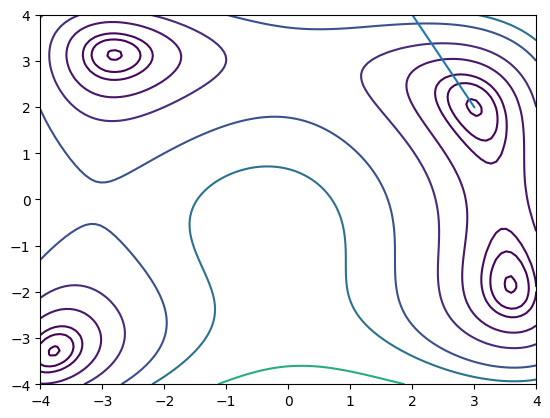

In [52]:
# himmelblau

x0 = [2, 4]
n = 2
t = np.sqrt(n*np.finfo(float).eps)
N = 1000

fig, ax = newthons_method_test(himme, himme_grad, himme_hess , x0, t, N)


## Beale

k = 10, x_k = [2.88586679e-13 1.00000000e+00], fk = 14.203125, ||gfk|| = 8.015194242612762e-12, ok = True


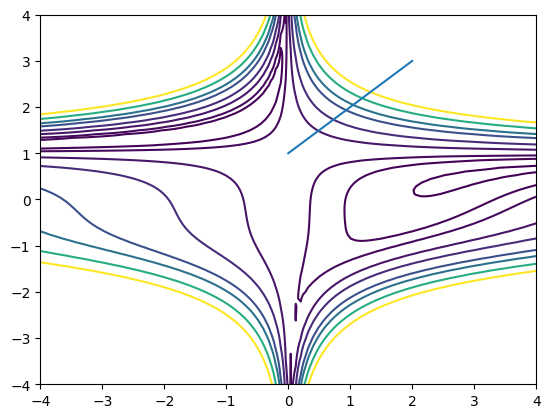

In [53]:
# beale

x0 = [2, 3]
n = 2
t = np.sqrt(n*np.finfo(float).eps)
N = 1000
fig, ax = newthons_method_test(beale, beale_grad, beale_hess,x0, t, N)

## Rosenbrock

k = 6, x_k = [1. 1.], fk = 3.4326873403439184e-20, ||gfk|| = 8.285737369125412e-09, ok = True


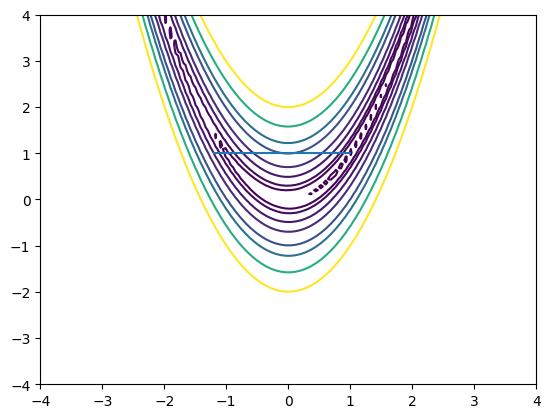

In [54]:
# rosenbrock

n = 2
x0 = [-1.2, 1.0]*int(n/2)
t = np.sqrt(n*np.finfo(float).eps)
N = 1000
fig, ax=newthons_method_test(rosen, rosen_grad, rosen_hess, x0, t, N)

In [55]:
# rosenbrock

n = 10
x0 = [-1.2, 1.0]*int(n/2)
t = np.sqrt(n*np.finfo(float).eps)
N = 1000
r, rg, rh = build_f_gradient_hessian(*rosenbrock(n))
newthons_method_test(r, rg, rh, x0, t, N)


k = 34, x_k = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], fk = 3.974615273793012e-26, ||gfk|| = 2.784779297608396e-13, ok = True


In [56]:
# rosenbrock

n = 20
x0 = [-1.2, 1.0]*int(n/2)
t = np.sqrt(n*np.finfo(float).eps)
N = 1000
r, rg, rh = build_f_gradient_hessian(*rosenbrock(n))
newthons_method_test(r, rg, rh, x0, t, N)
# rosenbrock(n)

k = 46, x_k = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], fk = 7.390640605789354e-29, ||gfk|| = 3.4459491339993465e-13, ok = True


## Hartmann

In [57]:
# hartmann

n = 6
x0 = [0]*6
t = np.sqrt(n*np.finfo(float).eps)
N = 1000
newthons_method_test(hart, hart_grad, hart_hess, x0, t, N)

k = 14, x_k = [-0.19076654 -0.13889587 -0.19177065 -0.24983657 -0.2596438  -0.54614109], fk = -1.329896908066998, ||gfk|| = 2.4640892308492656e-08, ok = True


_

```







```

---

## Ejercicio 3 (3 puntos)

Modifique la función que implementa el método de Newton del Ejercicio 2
para incluir el cálculo del tamaño de paso (Newton amortiguado).

1. Además de los parámetros que se mencionan en el Algoritmo 1, la
   función que implementa el método debe recibir los parámetros
   del algoritmo de backtracking: $\rho>0$, $c_1>0$ y el número de
   iteraciones máximas $N_b$. Fijamos el valor inicial $\alpha_{ini}=1$
   para el algoritmo de backtracking para intentar dar el paso completo
   como lo hace el método de Newton, pero
   si ese paso no satisface la condición de descenso, dejamos que lo recorte.
   
   No tenemos garantizado que la matriz Hessiana $\mathbf{H}_k$ sea
   definida positiva, así que agregamos los siguientes pasos al algoritmo
   después de calcular la dirección $\mathbf{p}_k$:
- Si $\mathbf{g}_k^\top\mathbf{p}_k>0$, hacer $\mathbf{p}_k = -\mathbf{p}_k$
  para que sea dirección de descenso.
- Calcular $\alpha_k$ usando el algoritmo de backtracking.
- Calcular $\mathbf{x}_{k+1} = \mathbf{x}_{k} + \alpha_k \mathbf{p}_{k}$.
   

2. Pruebe el algoritmo usando los puntos iniciales del Ejercicio 2,
   fijando la cantidad de iteraciones máximas $N=1000$, la tolerancia
   $\tau = \sqrt{n\epsilon_m}$, donde $\epsilon_m$ es el épsilon de máquina.
   Para el algoritmo de backtracking use $\rho=0.5, c_1=0.1$ y $N_b=500$.
   
   Imprima los mismos datos que se piden en el Ejercicio 2 para
   que pueda comparar los resultados
   
### Solución:

In [58]:
import numpy as np
from numpy.linalg import solve, norm
import matplotlib.pyplot as plt

def newthons_method_backtracked_mod_hess(f, gf, hf, x, t ,N, r=0.5, c=0.1, Nb=500):
    seq = []
    for k in range(N):
        if len(x) == 2:
            seq.append(x)

        g = gf(x)
        if norm(g) < t:
            return x, k, True, np.array(seq)
        H = hf(x)
        p = solve(H, -g)
        if g@p > 0:
            p = -p
        # backtraking
        a = 1
        for i in range(Nb):
            if f(*(x + a*p)) <= f(*x) + c*a*g@p:
                break
            a *= r

        x += a*p
    return x, N, False, np.array(seq)

def newthons_method_backtracked_mod_hess_test(f, gf, hf, x, t ,N, r=0.5, c=0.1, Nb=500):
    y, k, ok, steps = newthons_method_backtracked_mod_hess(f, gf, hf, x, t, N, r, c, Nb)

    print(f"k = {k}, x_k = {y}, fk = {f(*y)}, ||gfk|| = {norm(gf(y))}, ok = {ok}")
    if len(x) == 2:
        xlim = (-4, 4)
        ylim = (-4, 4)
        ax = np.linspace(*xlim, 100)
        ay = np.linspace(*ylim, 100)
        mX, mY = np.meshgrid(ax, ay)
        fig, ax = plt.subplots()
        mZ = f(mX, mY)
        ax.contour(mX, mY, mZ, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])
        ax.plot(*np.array(steps).T)

        return fig, ax

In [59]:
# bactraking setup
r = 0.5
c = 0.1
Nb = 500


## Himmelblau


k = 6, x_k = [3. 2.], fk = 7.394064262118014e-23, ||gfk|| = 6.758096355943399e-11, ok = True


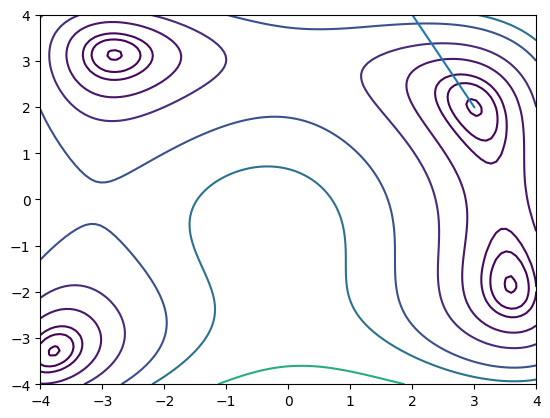

In [60]:
# himmelblau

x0 = [2, 4]
n = 2
t = np.sqrt(n*np.finfo(float).eps)
N = 1000

fig, ax = newthons_method_backtracked_mod_hess_test(himme, himme_grad, himme_hess , x0, t, N)

## Beale

k = 10, x_k = [2.88586679e-13 1.00000000e+00], fk = 14.203125, ||gfk|| = 8.015194242612762e-12, ok = True


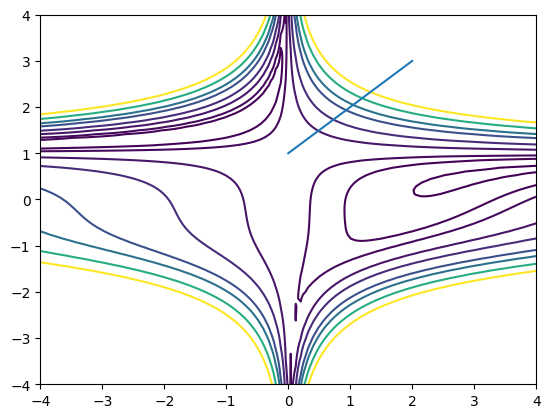

In [61]:
# beale

x0 = [2, 3]
n = 2
t = np.sqrt(n*np.finfo(float).eps)
N = 1000
fig, ax = newthons_method_backtracked_mod_hess_test(beale, beale_grad, beale_hess,x0, t, N)

## Rosenbrock

k = 21, x_k = [1. 1.], fk = 7.68116328604028e-24, ||gfk|| = 1.2167421246305936e-10, ok = True


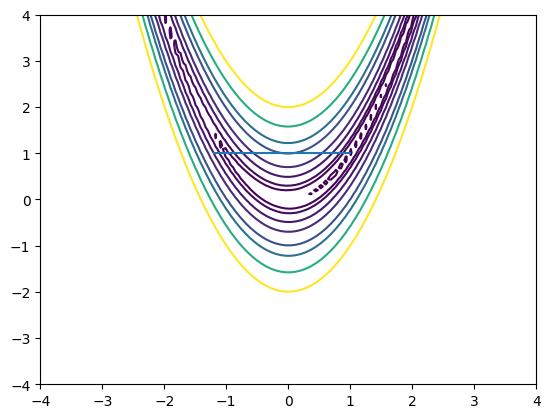

In [62]:
# rosenbrock

n = 2
x0 = [-1.2, 1.0]*int(n/2)
t = np.sqrt(n*np.finfo(float).eps)
N = 1000
fig, ax=newthons_method_backtracked_mod_hess_test(rosen, rosen_grad, rosen_hess, x0, t, N)

In [63]:
# rosenbrock

n = 10
x0 = [-1.2, 1.0]*int(n/2)
t = np.sqrt(n*np.finfo(float).eps)
N = 1000
r, rg, rh = build_f_gradient_hessian(*rosenbrock(n))
newthons_method_backtracked_mod_hess_test(r, rg, rh, x0, t, N)

k = 38, x_k = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], fk = 1.0133508740647648e-25, ||gfk|| = 6.025244242757982e-12, ok = True


In [64]:
# rosenbrock

n = 20
x0 = [-1.2, 1.0]*int(n/2)
t = np.sqrt(n*np.finfo(float).eps)
N = 1000
r, rg, rh = build_f_gradient_hessian(*rosenbrock(n))
newthons_method_backtracked_mod_hess_test(r, rg, rh, x0, t, N)

k = 51, x_k = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], fk = 2.1188104282004443e-20, ||gfk|| = 9.404418873848437e-10, ok = True


## Hartmann

In [65]:
# hartmann

n = 6
x0 = [0]*6
t = np.sqrt(n*np.finfo(float).eps)
N = 1000
newthons_method_backtracked_mod_hess_test(hart, hart_grad, hart_hess, x0, t, N)

k = 9, x_k = [0.20168951 0.15001069 0.47687397 0.27533243 0.31165162 0.65730053], fk = -3.042457737843049, ||gfk|| = 1.6269609794827197e-08, ok = True


Podemos notar que el numero de iteraciones es muy parecido a `newthon puro`, sin embargo el minimo para `hartmann` es muy cercano al global.

Para Beale sigue sin converger al minimo global.


_

```







```

---

## Ejercicio 4 (3 puntos)

Programe el método de Newton con modificación de los eigenvalores
de la Hessiana de acuerdo al Algoritmo 4 de la Clase 11.

1. Además de los parámetros que se mencionan en el Algoritmo 4, la
   función que implementa el método debe recibir los parámetros
   del algoritmo de backtracking: $\rho>0$, $c_1>0$ y el número de
   iteraciones máximas $N_b$. Fijamos el valor inicial $\alpha_{ini}=1$
   para el algoritmo de backtracking para intentar dar el paso completo.
   
- Puede usar la función [eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)
  de la librería Numpy para calcular la descomposión espectral de
  la Hessiana $\mathbf{H}_k$ y a partir de ésta calcular la Hessiana modificada.


2. Pruebe el algoritmo usando la cantidad de iteraciones máximas $N=1000$, la tolerancia
   $\tau = \sqrt{n\epsilon_m}$, donde $\epsilon_m$ es el épsilon de máquina,
   $\delta = 0.005$, para backtracking  use $\rho=0.5, c_1=0.1$ y $N_b=500$
   y los puntos iniciales del Ejercicio 2.
   
   Imprima los mismos datos que se piden en el Ejercicio 2 para
   que pueda comparar los resultados.
   
3. ¿Hay alguna ventaja de este algoritmo comparado con los implementados
   en los ejercicios 1 y 2, o basta con usar alguno de los anteriores?
   
## Solución:

In [66]:
import numpy as np
from numpy.linalg import solve, norm, eig
from scipy.linalg import cho_factor, cho_solve
import matplotlib.pyplot as plt

def newthons_method_mod_eig_hess(f, gf, hf, x, t ,N, s=0.005, r=0.5, c=0.1, Nb=500):
    seq = []
    for k in range(N):
        if len(x) == 2:
            seq.append(x)
        g = gf(x)
        if norm(g) < t:
            return x, k, True, np.array(seq)
        H = hf(x)

        eigenvalues, eigenvectors = eig(H)
        D = np.diag(eigenvalues)
        for i, ev in enumerate(eigenvalues):
            if ev < s:
                D[i, i] = s
            # else:
            #     D[i, i] = 0
        H = eigenvectors @ D @ eigenvectors.T
        p = cho_solve(cho_factor(H, True), -g)
        if g@p > 0:
            p = -p
        # backtraking
        a = 1
        for i in range(Nb):
            if f(*(x + a*p)) <= f(*x) + c*a*g@p:
                break
            a *= r

        x += a*p
    return x, N, False, np.array(seq)

def newthons_method_mod_eig_hess_test(f, gf, hf, x, t ,N, s=0.005, r=0.5, c=0.1, Nb=500):
    y, k, ok, steps = newthons_method_mod_eig_hess(f, gf, hf, x, t, N, s, r, c, Nb)

    print(f"k = {k}, x_k = {y}, fk = {f(*y)}, ||gfk|| = {norm(gf(y))}, ok = {ok}")
    if len(x) == 2:
        xlim = (-4, 4)
        ylim = (-4, 4)
        ax = np.linspace(*xlim, 100)
        ay = np.linspace(*ylim, 100)
        mX, mY = np.meshgrid(ax, ay)
        fig, ax = plt.subplots()
        mZ = f(mX, mY)
        ax.contour(mX, mY, mZ, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])
        ax.plot(*np.array(steps).T)

        return fig, ax

## Himmelblau

k = 6, x_k = [3. 2.], fk = 7.394064262118014e-23, ||gfk|| = 6.758096355943399e-11, ok = True


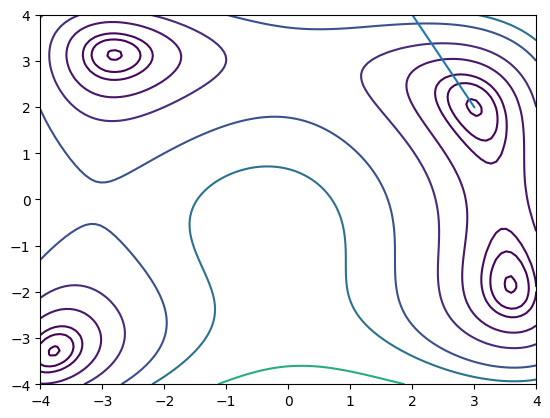

In [67]:
# himmelblau

x0 = [2, 4]
n = 2
t = np.sqrt(n*np.finfo(float).eps)
N = 1000

fig, ax = newthons_method_mod_eig_hess_test(himme, himme_grad, himme_hess , x0, t, N)


## Beale

k = 118, x_k = [3.00000004 0.50000001], fk = 2.0095795793059725e-16, ||gfk|| = 1.3922608028940594e-08, ok = True


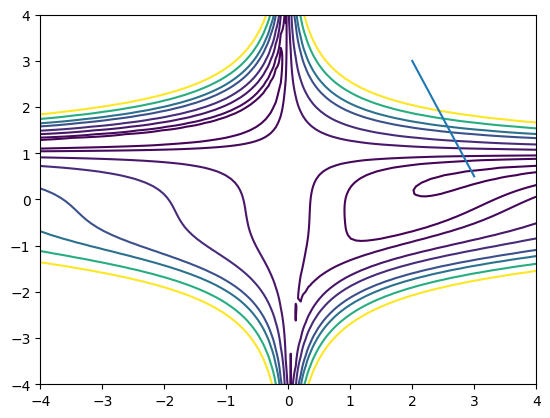

In [68]:
# beale

x0 = [2, 3]
n = 2
t = np.sqrt(n*np.finfo(float).eps)
N = 1000
fig, ax = newthons_method_mod_eig_hess_test(beale, beale_grad, beale_hess,x0, t, N)

## Rosenbrock

k = 21, x_k = [1. 1.], fk = 7.656448520398739e-24, ||gfk|| = 1.2166142178148448e-10, ok = True


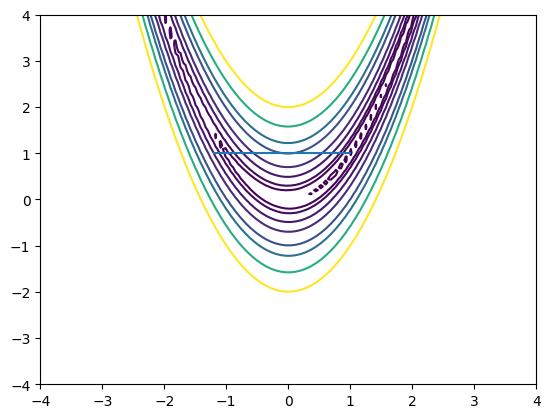

In [69]:
# rosenbrock

n = 2
x0 = [-1.2, 1.0]*int(n/2)
t = np.sqrt(n*np.finfo(float).eps)
N = 1000
fig, ax=newthons_method_mod_eig_hess_test(rosen, rosen_grad, rosen_hess, x0, t, N)

In [70]:
# rosenbrock

n = 10
x0 = [-1.2, 1.0]*int(n/2)
t = np.sqrt(n*np.finfo(float).eps)
N = 1000
r, rg, rh = build_f_gradient_hessian(*rosenbrock(n))
newthons_method_mod_eig_hess_test(r, rg, rh, x0, t, N)

k = 26, x_k = [-0.99326337  0.99660604  0.99824061  0.99898843  0.99922615  0.99907365
  0.99845418  0.99705625  0.99417938  0.98839263], fk = 3.98657911234714, ||gfk|| = 8.373961505886e-13, ok = True


In [71]:
# rosenbrock

n = 20
x0 = [-1.2, 1.0]*int(n/2)
t = np.sqrt(n*np.finfo(float).eps)
N = 1000
r, rg, rh = build_f_gradient_hessian(*rosenbrock(n))
newthons_method_mod_eig_hess_test(r, rg, rh, x0, t, N)

k = 41, x_k = [-0.9932861   0.99665107  0.99833032  0.99916774  0.9995852   0.99979328
  0.99989698  0.99994866  0.99997441  0.99998724  0.99999363  0.99999679
  0.99999834  0.99999905  0.99999927  0.99999913  0.99999855  0.99999724
  0.99999453  0.99998905], fk = 3.9866238542611976, ||gfk|| = 1.5201810377428862e-09, ok = True


## Hartmann

In [72]:
# hartmann

n = 6
x0 = [0]*6
t = np.sqrt(n*np.finfo(float).eps)
N = 1000
newthons_method_mod_eig_hess_test(hart, hart_grad, hart_hess, x0, t, N)

k = 6, x_k = [0.20168951 0.15001069 0.47687397 0.27533243 0.31165162 0.65730053], fk = -3.042457737843049, ||gfk|| = 1.7989548320566282e-14, ok = True


Pues en este caso parece ser que se pudo converger a los minimos globales.

Por ejemplo, en el caso de `Beale` los primero dos metodos convergian pero no a un minimo. Con la
modifición si conergia al minimo global.

Para `himmelblau` la cantidad de iteraciones fue casi **10x**, en cambio para las otras
se mantuvo parecida.

En el caso de `Rosenbrock` de dimensión 10 y 20, el
minimo al que se llego no fue exacta en comparación con los otros metodos.

Por lo anterior pienso que si conviene usar este metodo, parece mas robusto.